In [173]:
import numpy as np
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [174]:
makData = pd.read_csv("../Data/Private.csv", index_col=0)

In [175]:
makData

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
0,23APF412304454141015,U0391,U0391/673,LUKABWE DOUGLAS MARK,M,2022,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2,Very Good,"ST.JOSEPH'S S S, NAGGALAMA"
1,23APF345674424112360,U1249,U1249/532,LULE ISAAC,M,2022,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1,Very Good,KINAAWA HIGH SCHOOL
2,23APF1361730063122187,U0459,U0459/676,HAULAH SULAIT BIIRA,F,2022,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6,Very Good,KAWEMPE MUSLIM SS
3,23APF519647933132646,U1611,U1611/887,NAMBALYE EVELYNE,F,2022,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8,Good,OURLADY OF AFRICA SS NAMILYANGO
4,23APF1481620160129238,U0083,U0083/555,KEMIGISHA RUSIA,F,2022,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4,Good,IMMACULATE HEART GIRLS SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,U0017,U0017/548,KIZZA VANESSA ITRONCE,F,2022,17.0,KAMULI,VET,B. Veterinary Medicine,41.8,Very Good,IGANGA SECONDARY SCHOOL
14911,23APF963075058135059,U0033,U0033/581,OTIM DANIEL,M,2022,31.0,LIRA,VET,B. Veterinary Medicine,41.7,Very Good,"ST MARY'S COLLEGE, KISUBI"
14912,23APF1618205309130850,U0077,U0077/736,MUKETI JOVIA,F,2022,74.0,MARACHA,VET,B. Veterinary Medicine,41.6,Very Good,GOMBE SECONDARY SCHOOL
14913,23APF575513287117711,U0077,U0077/564,AWOR REBECCA,F,2022,31.0,LIRA,VET,B. Veterinary Medicine,40.4,Very Good,GOMBE SECONDARY SCHOOL


In [176]:
makData = makData.astype({"TOTAL WEIGHT": 'float', "INDEX NO": "string"})

In [177]:
# Save df
makData.to_csv("../Data/Private.csv")

In [178]:
# Return admissions by ditrict and year of entry.
makData.groupby(['DISTRICT', 'UACE YEAR', 'GENDER'],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count().head(50)

DISTRICT  UACE YEAR  GENDER
ABIM      2017       M          1
          2018       F          1
          2019       F          1
                     M          1
          2020       M          1
          2022       F         11
                     M         10
ADJUMANI  2010       M          1
          2019       F          1
          2020       F          2
                     M          1
          2022       F         35
                     M         36
AGAGO     2009       M          1
          2011       M          1
          2020       M          3
          2022       F         15
                     M         18
ALEBTONG  2006       M          1
          2018       M          1
          2019       F          1
          2022       F          9
                     M         14
AMOLATAR  2022       F          4
                     M          6
AMUDAT    2022       M          2
AMURIA    2016       M          1
          2019       F          1
          2020      

In [179]:
# Gender Analysis
makData.groupby(['COURSE NAME', 'GENDER'],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count().sort_values(ascending=True)

COURSE NAME                                               GENDER
B.Architecture                                            F           1
B.Urban and Regional Planning (EVE)                       M           1
DIP.(Performing Arts)                                     F           1
BACHELOR OF PROCUREMENT & CHAIN SUPPLY MGT - EVE (MBALE)  F           1
BSC.(Dental Labaratory Technology)                        M           1
                                                                   ... 
B. International Business                                 F         308
Bachelor of Business Administration (EVE)                 M         352
                                                          F         431
Bachelor of Business Administration                       F         535
Bachelor of Arts with Education                           F         571
Name: INDEX NO, Length: 298, dtype: int64

In [180]:
# 
regions = {"Eastern": ['Amuria', 'Budaka', 'Bududa', 'Bugiri', 'Bukedea', 'Bukwa', 'Bulambuli',
                      'Busia', 'Butalega', 'Buyende', 'Iganga', 'Jinja', 'Kaberamaido', 'Kamuli', 'Kaliro',
                      'Kapchorwa', 'Katakwi', 'Kibuku', 'Kumi', 'Kween', 'Luuka', 'Manafwa',
                       'Mayuge', 'Mbale', 'Namayingo', 'Namutumba', 'Ngora', 'Pallisa', 'Serere',
                      'Sironko', 'Soroti', 'Tororo'],
          'Central': ['Buikwe', 'Bukomansimbi', 'Butambala', 'Buvuma', 'Gomba', 'Kalangala', 'Kalungu',
                     'Kampala', 'Kayunga', 'Kiboga', 'Kyankwazi', 'Luwero', 'Lwengo', 'Lyantonde',
                     'Masaka', 'Mityana', 'Mpigi', 'Mubende', 'Mukono', 'Nakaseke', 'Nakasongola',
                     'Rakai', 'Sembabule', 'Wakiso'],
          'Northern': ['Abim', 'Adjumani', 'Agago', 'Alebtong', 'Amolator', 'Amudat', 'Amuru', 'Apac',
                      'Arua', 'Dokolo', 'Gulu', 'Kaabong', 'Kitgum', 'Koboko', 'Kole', 'Kotido', 
                      'Lamwo', 'Lira', 'Maracha', 'Moroto', 'Moyo', 'Nakapiripiriti', 'Napak', 'Nebbi',
                      'Nwoya', 'Otuke', 'Oyam', 'Pader', 'Yumbe', 'Zombe'],
          'Western': ['Buhweju', 'Bulisa', 'Bundibugyo', 'Bushenyi', 'Hoima', 'Ibanda', 'Isingiro',
                     'Kabale', 'Kabarole', 'Kamwenge', 'Kanungu', 'Kasese', 'Kibaale', 'kiruhura', 'Kiryandongo',
                     'Kisoro', 'Kyengegwa', 'Masindi', 'Mbarara', 'Mitooma', 'Ntoroko', 'Ntungamo', 'Ribirizi',
                     'Rukungiri', 'Sheema']}
for key, value in regions.items():
    for i in range(len(value)):
        value[i] = value[i].upper()

In [181]:
regions

{'Eastern': ['AMURIA',
  'BUDAKA',
  'BUDUDA',
  'BUGIRI',
  'BUKEDEA',
  'BUKWA',
  'BULAMBULI',
  'BUSIA',
  'BUTALEGA',
  'BUYENDE',
  'IGANGA',
  'JINJA',
  'KABERAMAIDO',
  'KAMULI',
  'KALIRO',
  'KAPCHORWA',
  'KATAKWI',
  'KIBUKU',
  'KUMI',
  'KWEEN',
  'LUUKA',
  'MANAFWA',
  'MAYUGE',
  'MBALE',
  'NAMAYINGO',
  'NAMUTUMBA',
  'NGORA',
  'PALLISA',
  'SERERE',
  'SIRONKO',
  'SOROTI',
  'TORORO'],
 'Central': ['BUIKWE',
  'BUKOMANSIMBI',
  'BUTAMBALA',
  'BUVUMA',
  'GOMBA',
  'KALANGALA',
  'KALUNGU',
  'KAMPALA',
  'KAYUNGA',
  'KIBOGA',
  'KYANKWAZI',
  'LUWERO',
  'LWENGO',
  'LYANTONDE',
  'MASAKA',
  'MITYANA',
  'MPIGI',
  'MUBENDE',
  'MUKONO',
  'NAKASEKE',
  'NAKASONGOLA',
  'RAKAI',
  'SEMBABULE',
  'WAKISO'],
 'Northern': ['ABIM',
  'ADJUMANI',
  'AGAGO',
  'ALEBTONG',
  'AMOLATOR',
  'AMUDAT',
  'AMURU',
  'APAC',
  'ARUA',
  'DOKOLO',
  'GULU',
  'KAABONG',
  'KITGUM',
  'KOBOKO',
  'KOLE',
  'KOTIDO',
  'LAMWO',
  'LIRA',
  'MARACHA',
  'MOROTO',
  'MOYO',
  '

In [182]:
# Regions
def get_region(district):
    for regions_names, districts in regions.items():
        if district in regions[regions_names]:
            return regions_names

In [183]:
# Data table with regions
makData['REGION'] = makData['DISTRICT'].apply(get_region)

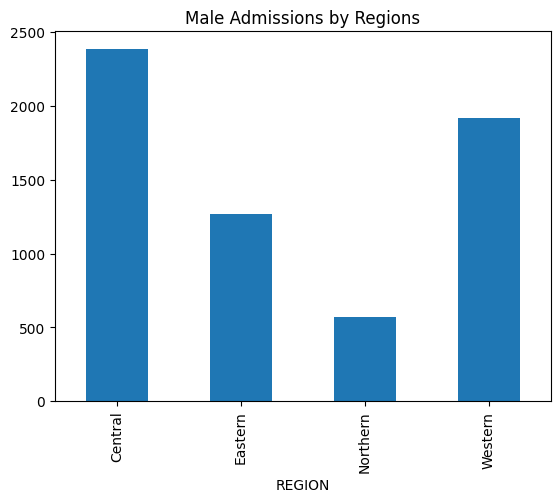

In [184]:
# Gender == Male
makData[makData["GENDER"] == "M"].groupby(["REGION"])["INDEX NO"].count().plot.bar(
    # kind="bar",
    title="Male Admissions by Regions",
    x="Regions",
    y="Students Admitted"
);
plt.savefig("Male Admissions by Region.png");

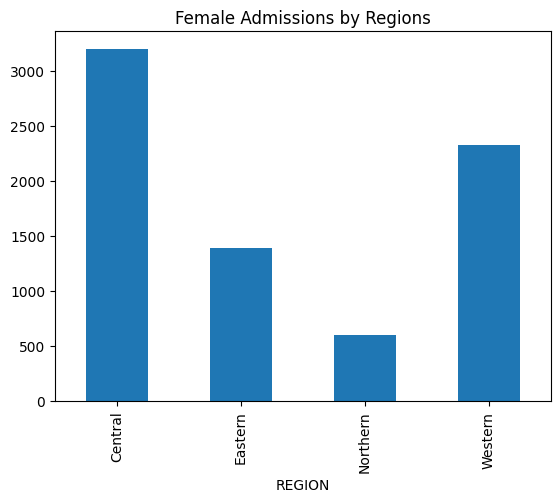

In [185]:
# Gender == Female
makData[makData["GENDER"] == "F"].groupby(["REGION"])["INDEX NO"].count().plot.bar(
    # kind="bar",
    title="Female Admissions by Regions",
    x="Regions",
    y="Students Admitted"
);
plt.savefig("Female Admissions by Region.png");

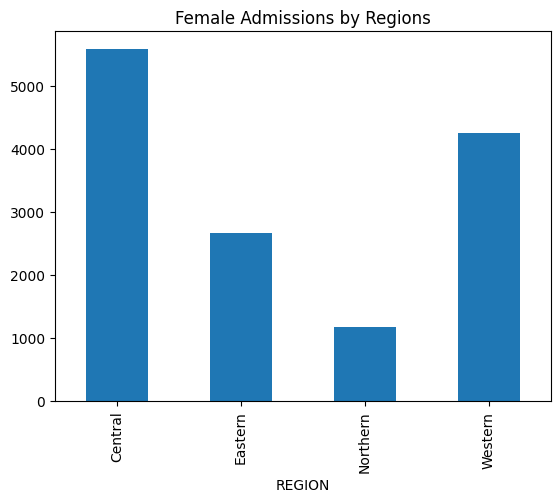

In [186]:
# Comparisons
# Gender == Female
makData.groupby(["REGION"])["INDEX NO"].count().plot.bar(
    # kind="bar",
    title="Female Admissions by Regions",
    x="Regions",
    y="Students Admitted"
);
plt.savefig("Female Admissions by Region.png");

In [187]:
makData.groupby(['DISTRICT', 
                 # 'UACE YEAR', 
                 # 'GENDER',
                ],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count().head(50)

DISTRICT
ABIM              26
ADJUMANI          76
AGAGO             38
ALEBTONG          26
AMOLATAR          10
AMUDAT             2
AMURIA            44
AMURU             20
APAC              56
ARUA             172
BUDAKA            60
BUDUDA            36
BUGIRI            92
BUHWEJU           32
BUIKWE           216
BUKEDEA           72
BUKOMANSIMBI      74
BUKWO             20
BULAMBULI         28
BULIISA           22
BUNDIBUGYO        22
BUNYANGABU        36
BUSHENYI         331
BUSIA            216
BUTALEJA          68
BUTAMBALA        111
BUTEBO            10
BUVUMA             2
BUYENDE           24
DOKOLO            24
GOMBA             92
GULU             170
HOIMA            236
IBANDA           213
IGANGA           213
ISINGIRO         191
JINJA            299
KAABONG           12
KABALE           243
KABAROLE         225
KABERAMAIDO       48
KAGADI            46
KAKUMIRO          35
KALANGALA          8
KALIRO            41
KALUNGU           63
KAMPALA         1059
KAMU

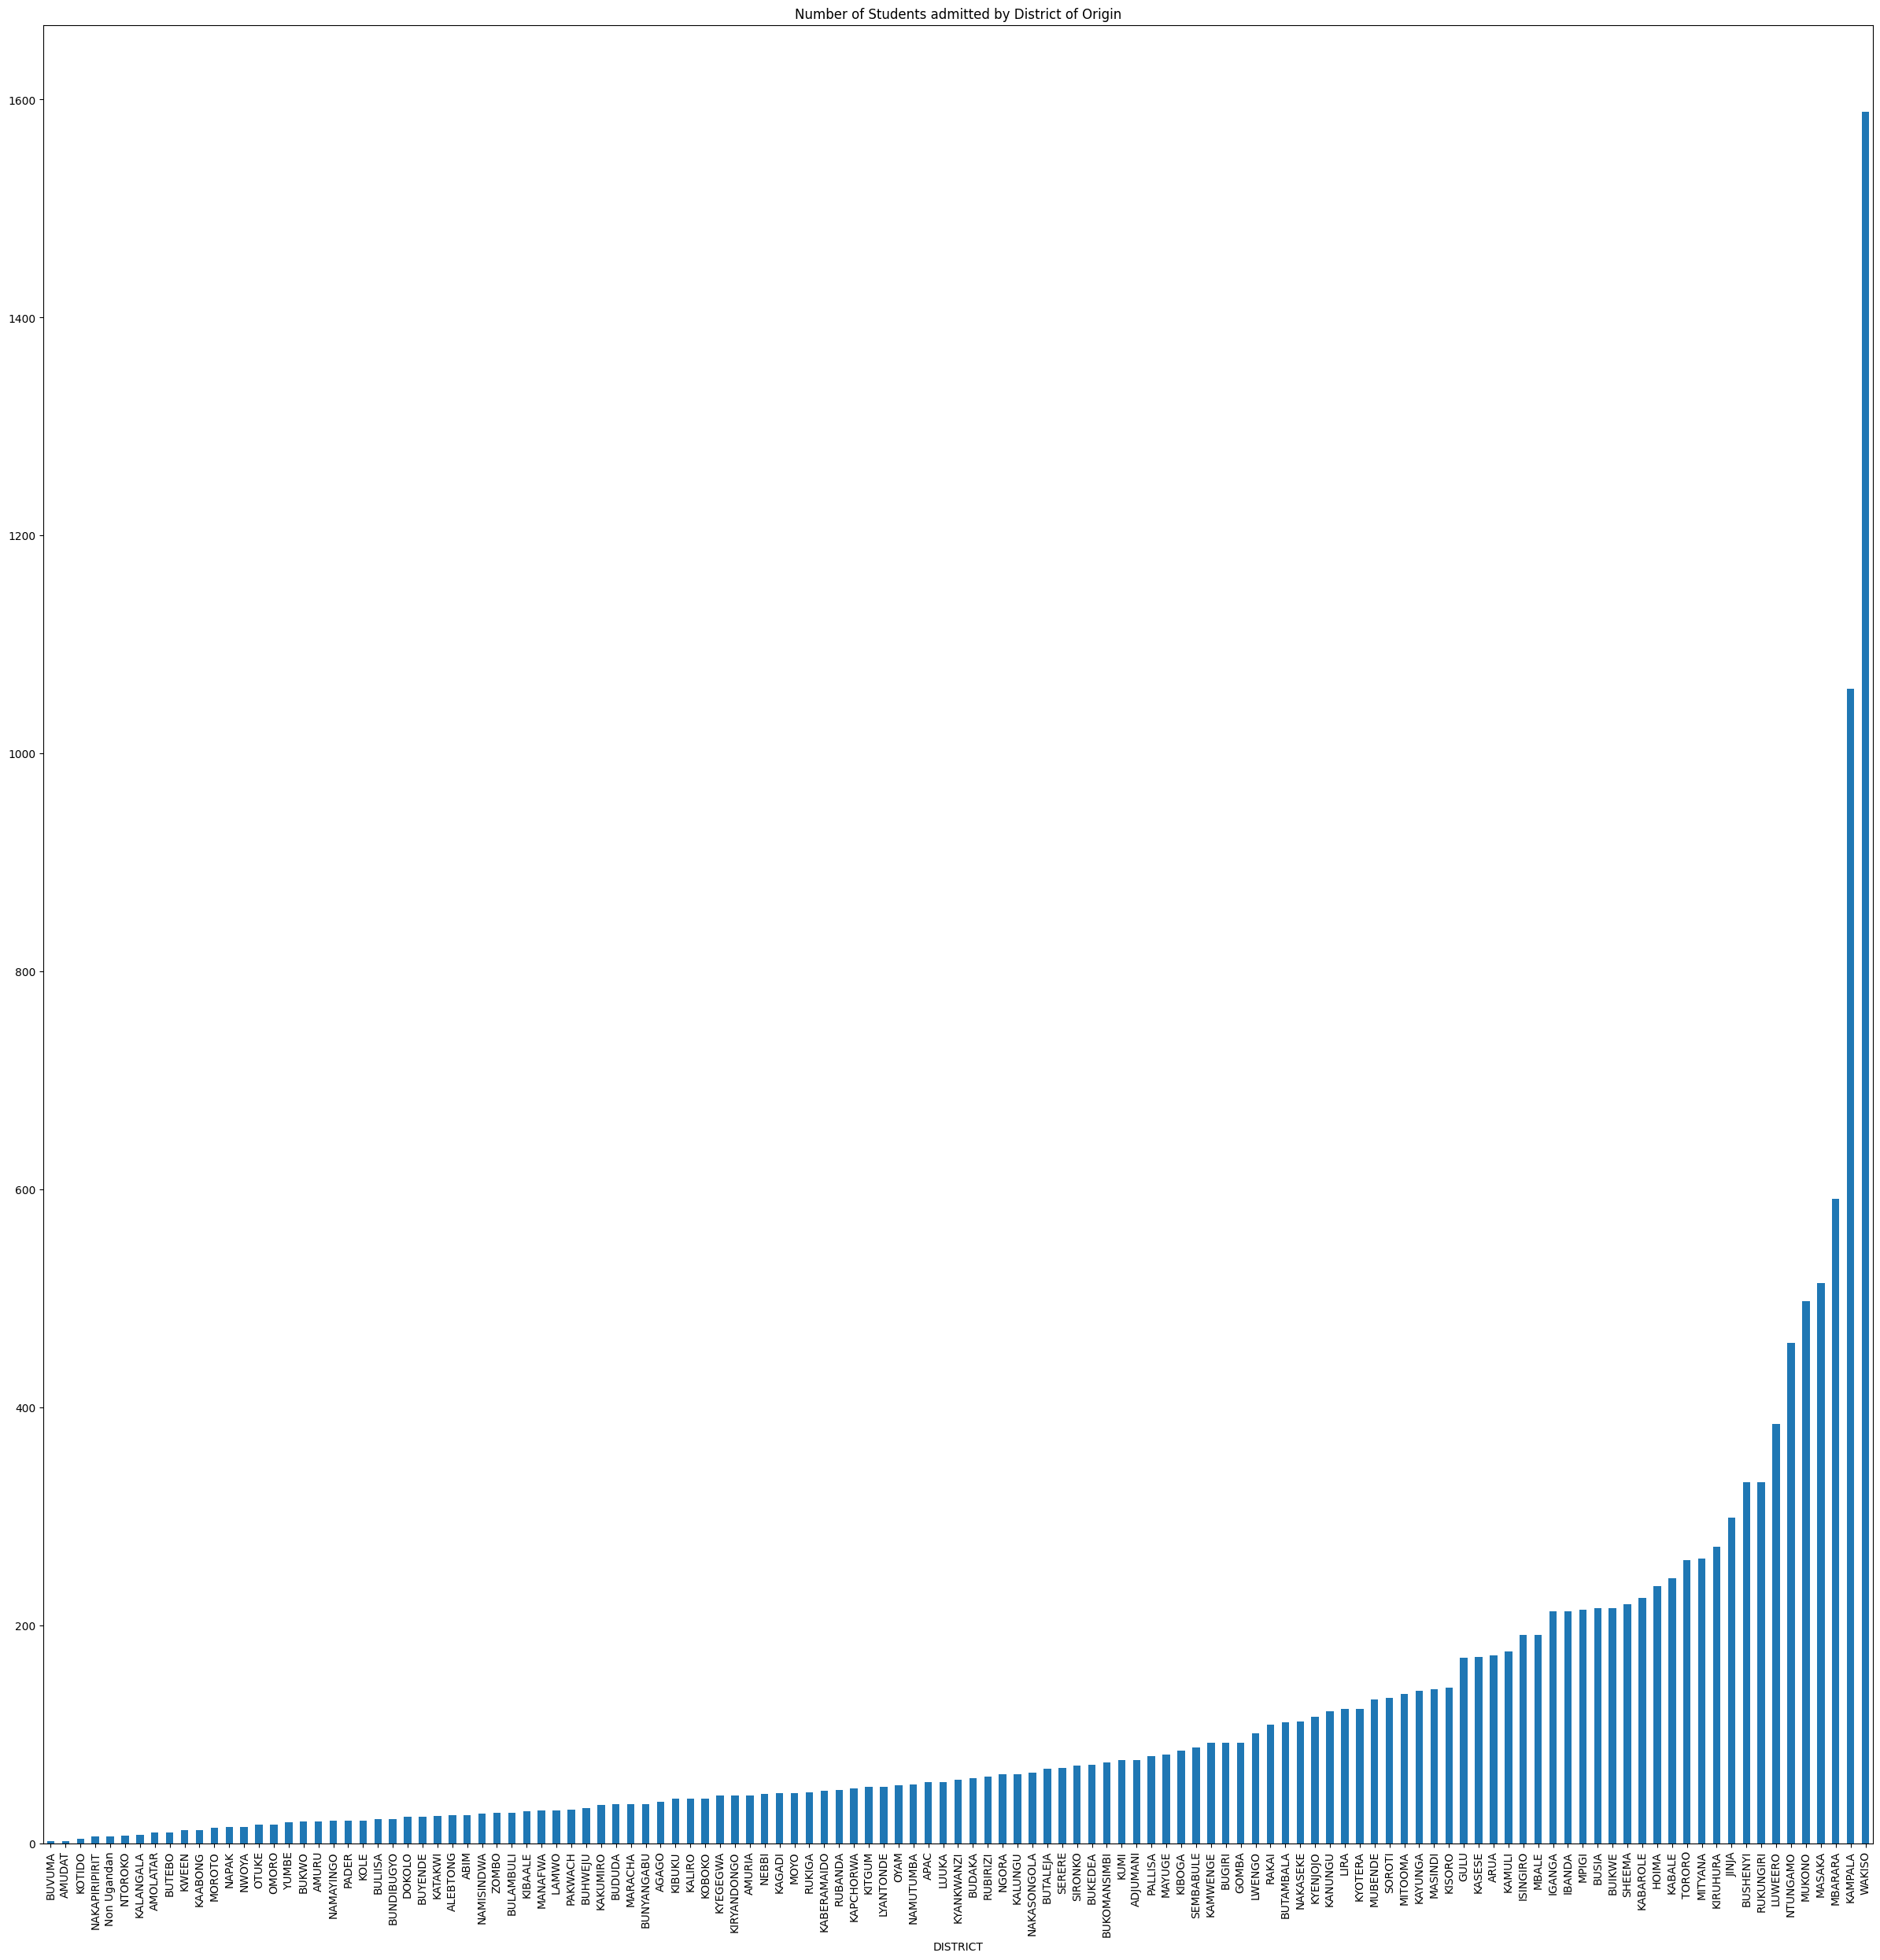

In [188]:
plt.figure(figsize=(30, 30));
makData.groupby(['DISTRICT', 
                 # 'UACE YEAR', 
                 # 'GENDER',
                ],
                sort=True,
#               axis="columns"
                           )['INDEX NO'].count(
    
                           ).sort_values(ascending=True
                   ).plot(kind="bar",
                          title="Number of Students admitted by District of Origin",
x="District",
y="Students",
                         );
plt.savefig("AdmissionByDistrict.png");

In [189]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
grouped = s.groupby(level=0)

In [190]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [191]:
# Sorting process consumes processor resources, for potential speedup, 
# the sorting option can be disabled.
makData.groupby(['DISTRICT', 'UACE YEAR', 'GENDER'],
                sort=True,
#               axis="columns"
#                 as_index=False
                           )['INDEX NO'].last()

DISTRICT  UACE YEAR  GENDER
ABIM      2017       M         U0660/516
          2018       F         U2924/502
          2019       F         U0018/766
                     M         U1244/619
          2020       M         U1698/541
                                 ...    
ZOMBO     2014       M         U0109/659
          2016       M         U1443/521
          2020       M         U1609/771
          2022       F         U1207/572
                     M         U1224/688
Name: INDEX NO, Length: 917, dtype: string

In [192]:
# Getting admitted Students from IGANGA district
makData.groupby(["DISTRICT"]).get_group(('IGANGA', ))

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL,REGION
18,23APF980625096133316,U0737,U0737/531,MUDOBYA CHRISTINE,F,2007,10.0,IGANGA,ACC,BSC. Accounting (EVE),34.6,Good,BULO PARENTS S S,Eastern
42,23APF271115874132692,U1879,U1879/641,NAKIYEMBA PHIONA,F,2022,10.0,IGANGA,ACC,BSC. Accounting (EVE),30.3,Good,JINJA PROGRESSIVE SS,Eastern
55,23APF825010272123233,U0061,U0061/552,MUTESI SHADIA,F,2022,10.0,IGANGA,ACC,BSC. Accounting (EVE),28.6,Average,NABISUNSA GIRLS' SCHOOL,Eastern
89,23APF1502921010146109,U1525,U1525/532,KASADHA NATHAN,M,2022,10.0,IGANGA,ACC,BSC. Accounting (EVE),25.0,Average,IGANGA TOWN VIEW SENIOR SECONDARY SCHOOL,Eastern
127,23APF6816076136686,U0812,U0812/509,KASADHA AUSI,M,2022,10.0,IGANGA,ACC,BSC. Accounting (EVE),19.9,Low,IGANGA PROGRESSIVE SEC.SCHOOL,Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14646,23APF767968007139054,U0110,U0110/554,ASHA ISMAEL KANTONO,F,2022,10.0,IGANGA,TLM,B.Transport and Logistics Management (EVE),19.8,Low,BUKOYO SECONDARY SCHOOL,Eastern
14784,23APF457993029146229,U0806,U0806/555,WATEMA ANDREW CHRISTIAN,M,2022,10.0,IGANGA,TTM,B.Travel and Tourism Management (EVE),25.4,Average,ST.LAWRENCE CITIZENS HIGH SCHOOL CREAMLAND CAMPUS,Eastern
14837,23APF1019156265113557,U0966,U0966/517,NAKKU PROSSY,F,2022,10.0,IGANGA,TTM,B.Travel and Tourism Management (EVE),21.8,Average,"ST.THOMAS AQUINAS SS, KAWEMPE",Eastern
14871,23APF1402882860117439,U1879,U1879/877,DHIRIVAAWA PERCY,M,2022,10.0,IGANGA,TTM,B.Travel and Tourism Management (EVE),19.4,Low,JINJA PROGRESSIVE SS,Eastern


In [193]:
# This returns unique year counts for each district
plt.figure(figsize=(30, 30));
makData.groupby("DISTRICT")['UACE YEAR'].nunique().sort_values()

DISTRICT
BUVUMA            1
NTOROKO           1
BUHWEJU           1
KAABONG           1
NAKAPIRIPIRIT     1
                 ..
MBARARA          13
BUSIA            14
MUKONO           15
WAKISO           15
KAMPALA          16
Name: UACE YEAR, Length: 123, dtype: int64

<Figure size 3000x3000 with 0 Axes>

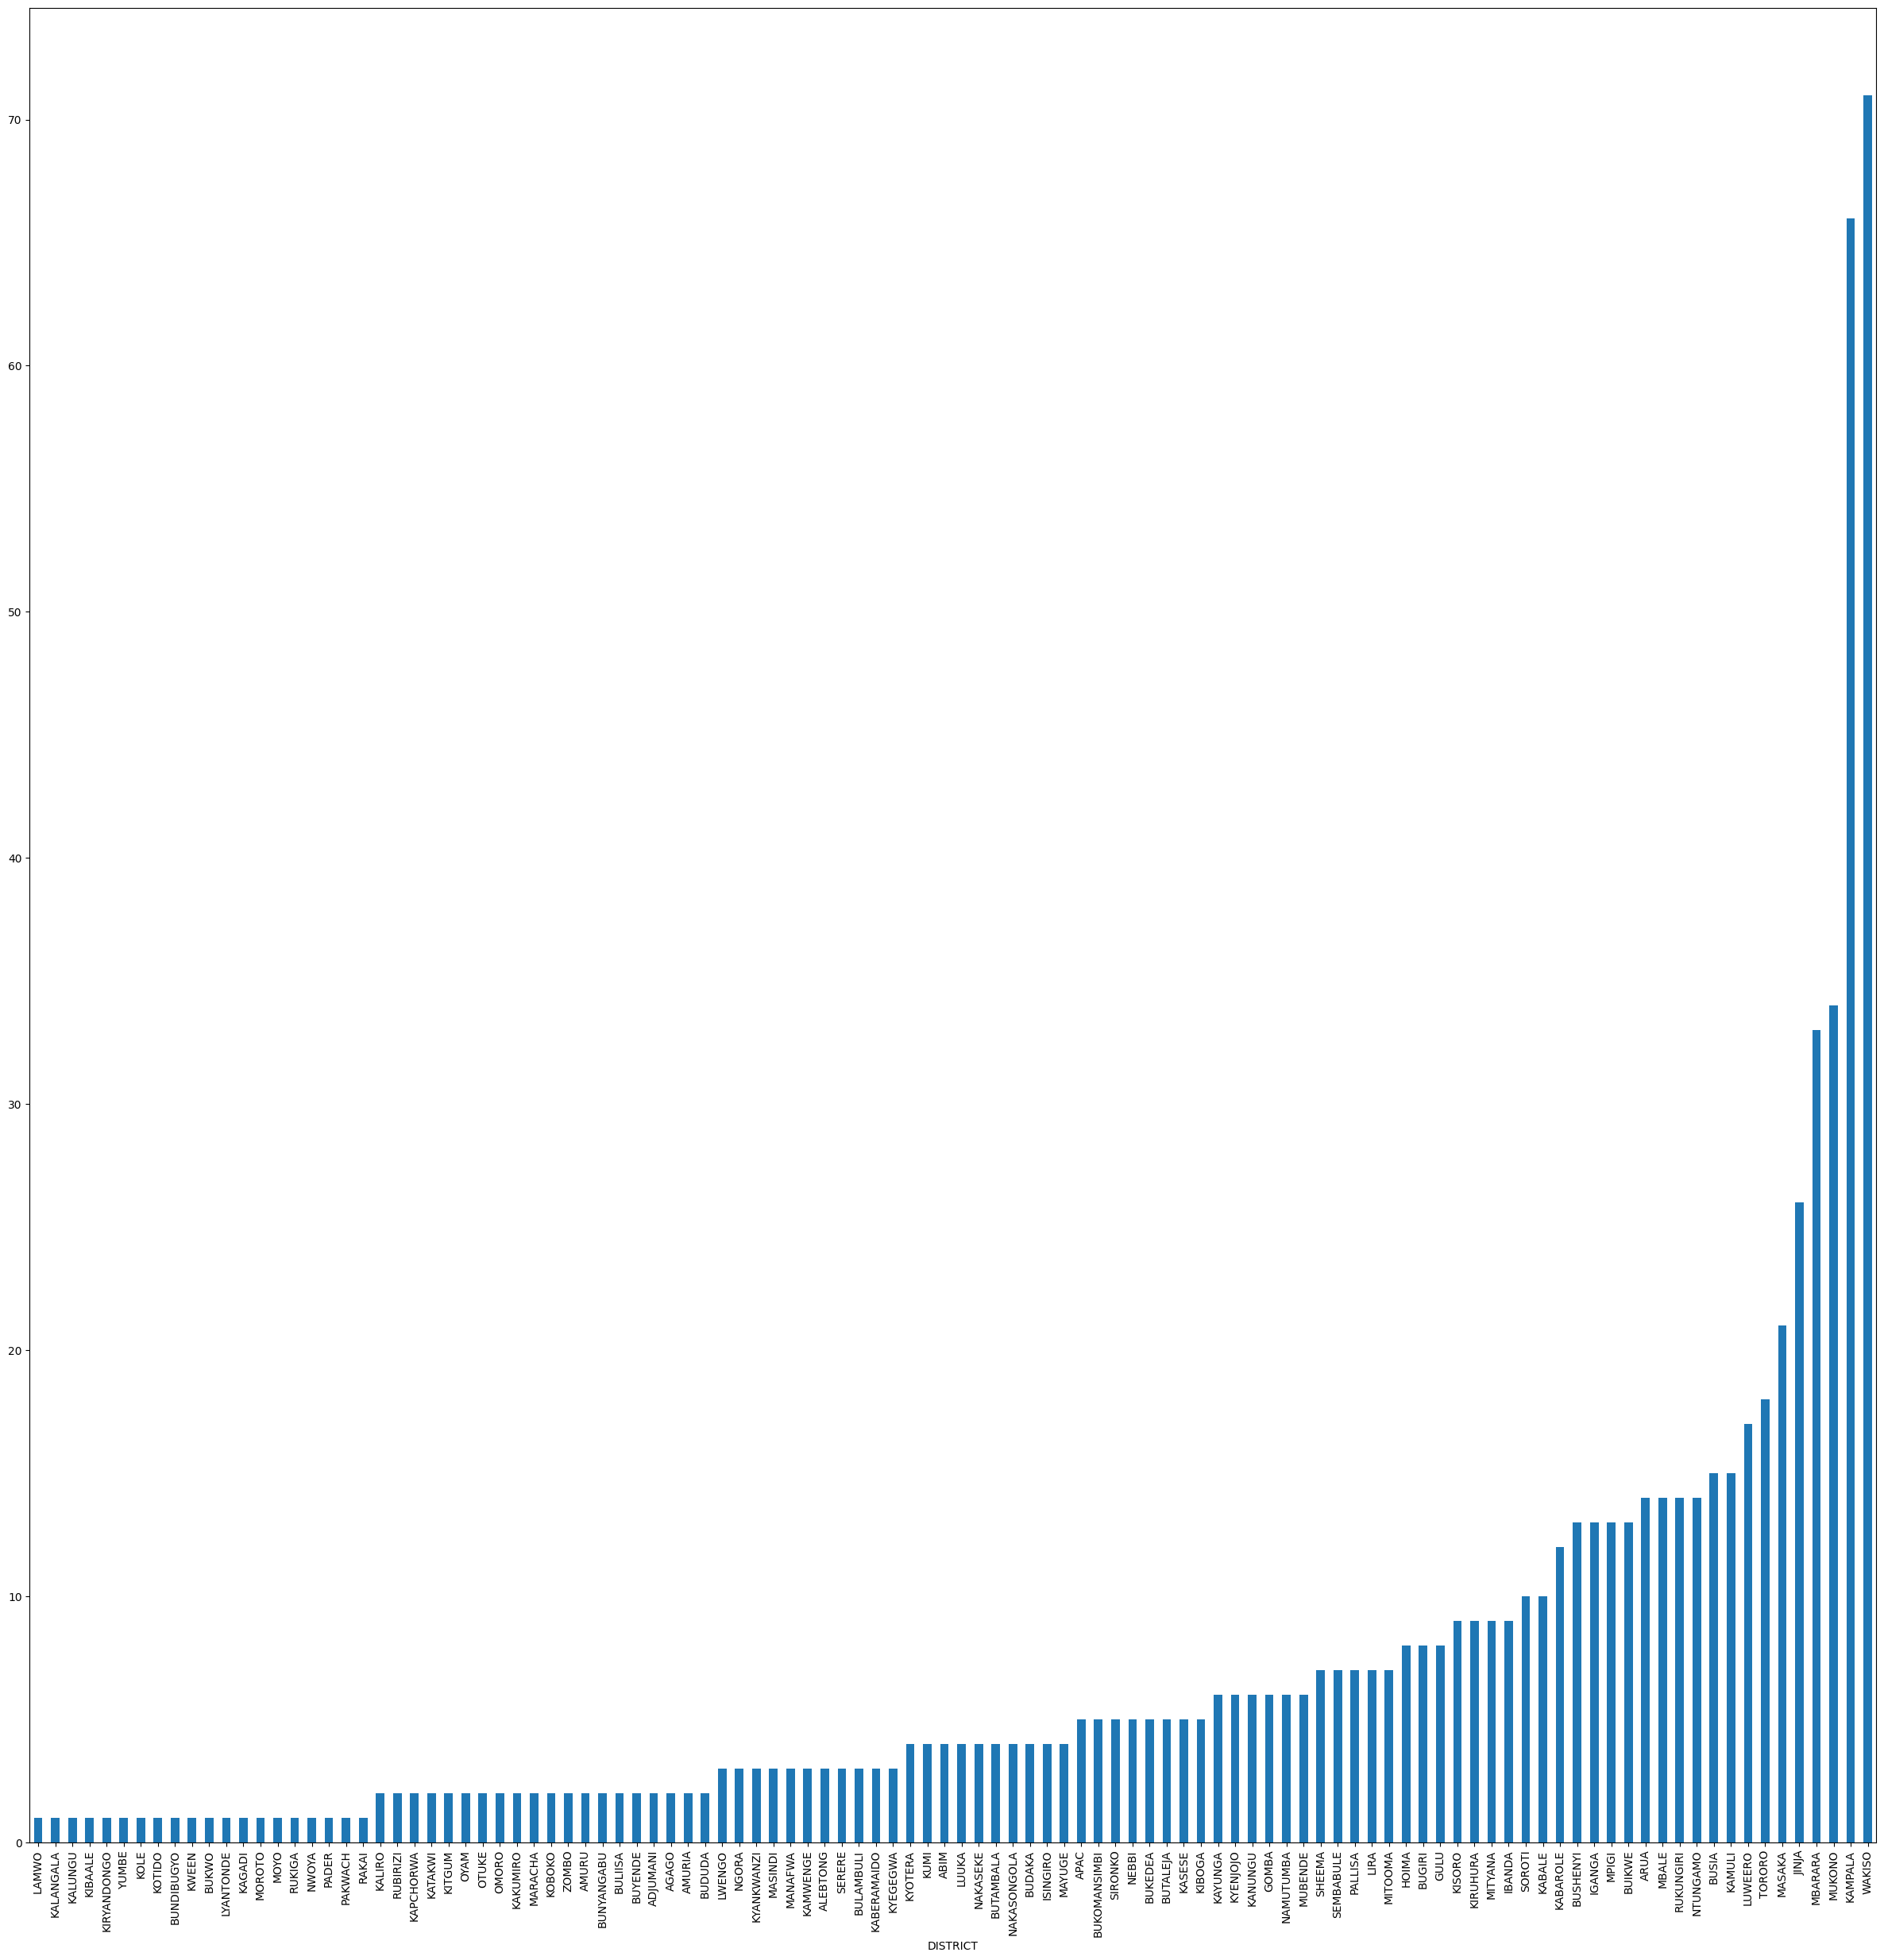

In [194]:
# Students admitted with uace year before 2020
plt.figure(figsize=(30, 30));
makData[makData["UACE YEAR"] < 2020].groupby(['DISTRICT']
#                 ,as_index=False
               )["UACE YEAR"].agg('count').sort_values().plot.bar();
plt.savefig("CountofNon2022 by District.png");

In [195]:
makData.groupby(["UACE YEAR"])["INDEX NO"].nunique()

UACE YEAR
1995        2
1996        3
1999        3
2000        1
2001        4
2002        5
2003        4
2004        4
2005       21
2006       11
2007        9
2008       20
2009       21
2010       23
2011       29
2012       31
2013       40
2014       39
2015       34
2016       55
2017       75
2018       93
2019      233
2020      492
2022    13662
Name: INDEX NO, dtype: int64

In [196]:
def get_school_indexNo(studentIndex):
    return str(studentIndex)[:5]

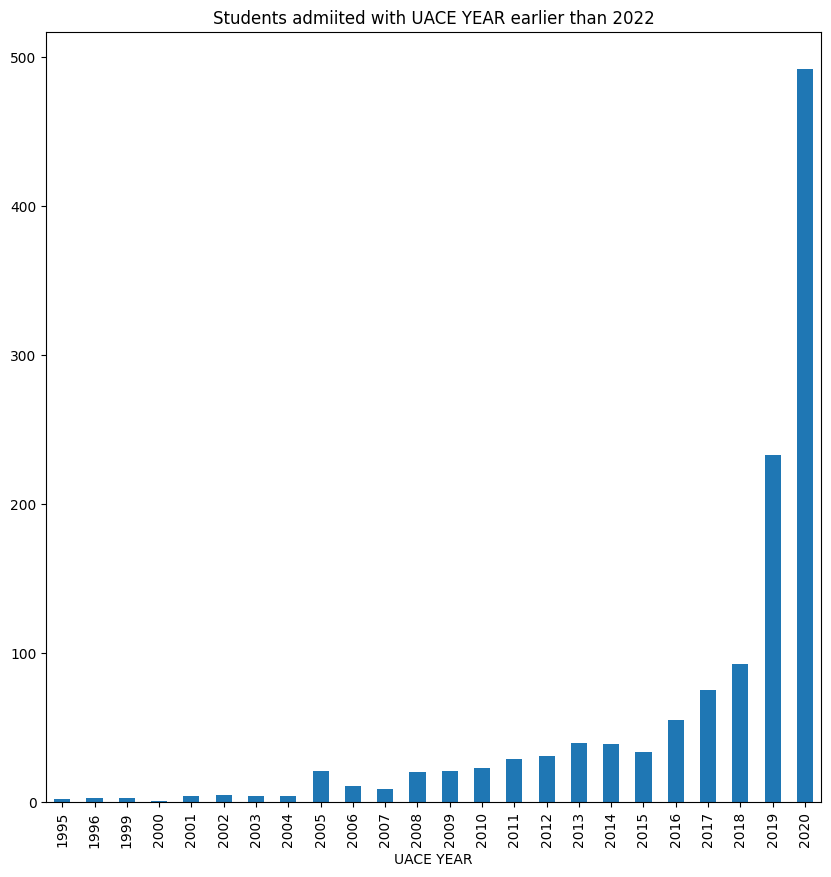

In [197]:
# UACE Year admission
plt.figure(
    figsize=(10, 10),
)
makData[makData["UACE YEAR"] < 2022].groupby(["UACE YEAR"])["INDEX NO"].nunique().plot(
    kind="bar",
    title="Students admiited with UACE YEAR earlier than 2022",
    x="UACE YEAR",
    y="Students",
);

In [198]:
# This adds a column named 'School Index' computed from student Index Number
makData['SCHOOL INDEX'] = makData['INDEX NO'].apply(get_school_indexNo)

In [199]:
# Group by district, school Index, UACE year, Gender and return count for data
makData.groupby(['DISTRICT', 'SCHOOL INDEX', 'UACE YEAR', 'GENDER']).count().tail(35)

APPLICATION NO  INDEX NO  NAME  CODE  \
DISTRICT SCHOOL INDEX UACE YEAR GENDER                                         
YUMBE    U0459        2022      M                    1         1     1     1   
         U0630        2022      F                    1         1     1     1   
         U0857        2022      M                    1         1     1     1   
         U0896        2022      F                    1         1     1     1   
         U1072        2022      M                    1         1     1     1   
         U1354        2022      F                    1         1     1     1   
         U2596        2022      F                    1         1     1     1   
         U2789        2022      F                    1         1     1     1   
         U2924        2022      F                    1         1     1     1   
ZOMBO    U0069        2022      M                    1         1     1     1   
         U0085        2022      F                    1         1     1     1   
         U0102        2022      M                    1         1     1     1   
         U0109        2014      M                    1         1     1     1   
         U0245        2022      F                    1         1     1     1   
         U0818        2022      M                    1         1     1     1   
         U0913        2022      F                    1         1     1     1   
         U0922        2022      M                    1         1     1     1   
         U1085        2022      F                    1         1     1     1   
         U1104        2022      F                    1         1     1     1   
                                M                    2         2     2     2   
         U1107        2022      F                    1         1     1     1   
         U1141        2022      M                    2         2     2     2   
         U1207        2022      F                    1         1     1     1   
                                M                    1         1     1     1   
         U1224        2022      F                    1         1     1     1   
                                M                    1         1     1     1   
         U1443        2016      M                    1         1     1     1   
         U1609        2020      M                    1         1     1     1   
         U1710        2022      F                    1         1     1     1   
                                M                    1         1     1     1   
         U2032        2022      M                    1         1     1     1   
         U2048        2022      F                    1         1     1     1   
         U2663        2022      M                    1         1     1     1   
         U2789        2022      M                    1         1     1     1   
         U3191        2022      M                    1         1     1     1   

                                        COURSE CODE  COURSE NAME  \
DISTRICT SCHOOL INDEX UACE YEAR GENDER                             
YUMBE    U0459        2022      M                 1            1   
         U0630        2022      F                 1            1   
         U0857        2022      M                 1            1   
         U0896        2022      F                 1            1   
         U1072        2022      M                 1            1   
         U1354        2022      F                 1            1   
         U2596        2022      F                 1            1   
         U2789        2022      F                 1            1   
         U2924        2022      F                 1            1   
ZOMBO    U0069        2022      M                 1            1   
         U0085        2022      F                 1            1   
         U0102        2022      M                 1            1   
         U0109        2014      M                 1            1   
         U0245        2022      F                 1        

In [200]:
makData.groupby(['REGION', 'DISTRICT', 'SCHOOL INDEX', 'GENDER'])['NAME'].count()

REGION   DISTRICT  SCHOOL INDEX  GENDER
Central  BUIKWE    U0005         F         1
                   U0013         F         1
                   U0017         F         1
                   U0018         F         2
                                 M         1
                                          ..
Western  SHEEMA    U3614         M         3
                   U3740         F         1
                   U3845         F         1
                   U3886         F         1
                                 M         1
Name: NAME, Length: 8309, dtype: int64

<Axes: xlabel='REGION'>

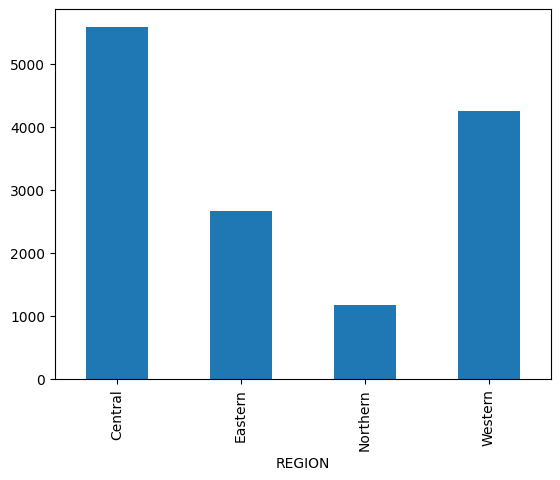

In [201]:
makData.groupby('REGION')['DISTRICT'].count().plot(
    kind="bar"
)

In [202]:
# counts of admissions per region
regionalAdmissions = makData.groupby('REGION')["GENDER"].apply('count')

In [203]:
regionalAdmissions

REGION
Central     5584
Eastern     2662
Northern    1174
Western     4250
Name: GENDER, dtype: int64

In [204]:
# data = list(regionalAdmissions.ndarray)

In [205]:
# data

In [206]:
regionalAdmissions = pd.DataFrame(data=regionalAdmissions,
                                  # index=regionalAdmissions.index,
                                 )

In [207]:
regionalAdmissions

,GENDER
REGION,
Central,5584
Eastern,2662
Northern,1174
Western,4250


<Axes: ylabel='REGION'>

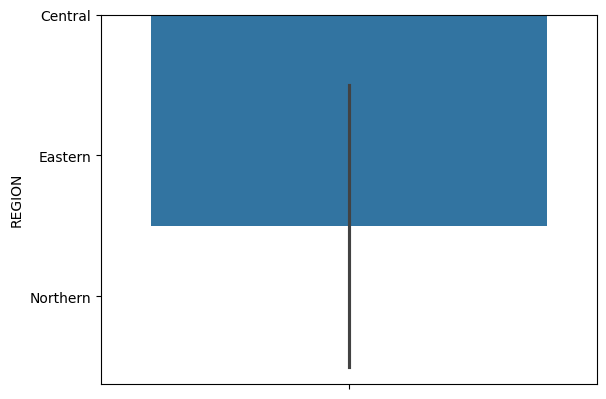

In [208]:
# visualize admissions by region
import seaborn as sns
sns.barplot(regionalAdmissions,
          y='REGION',
           )

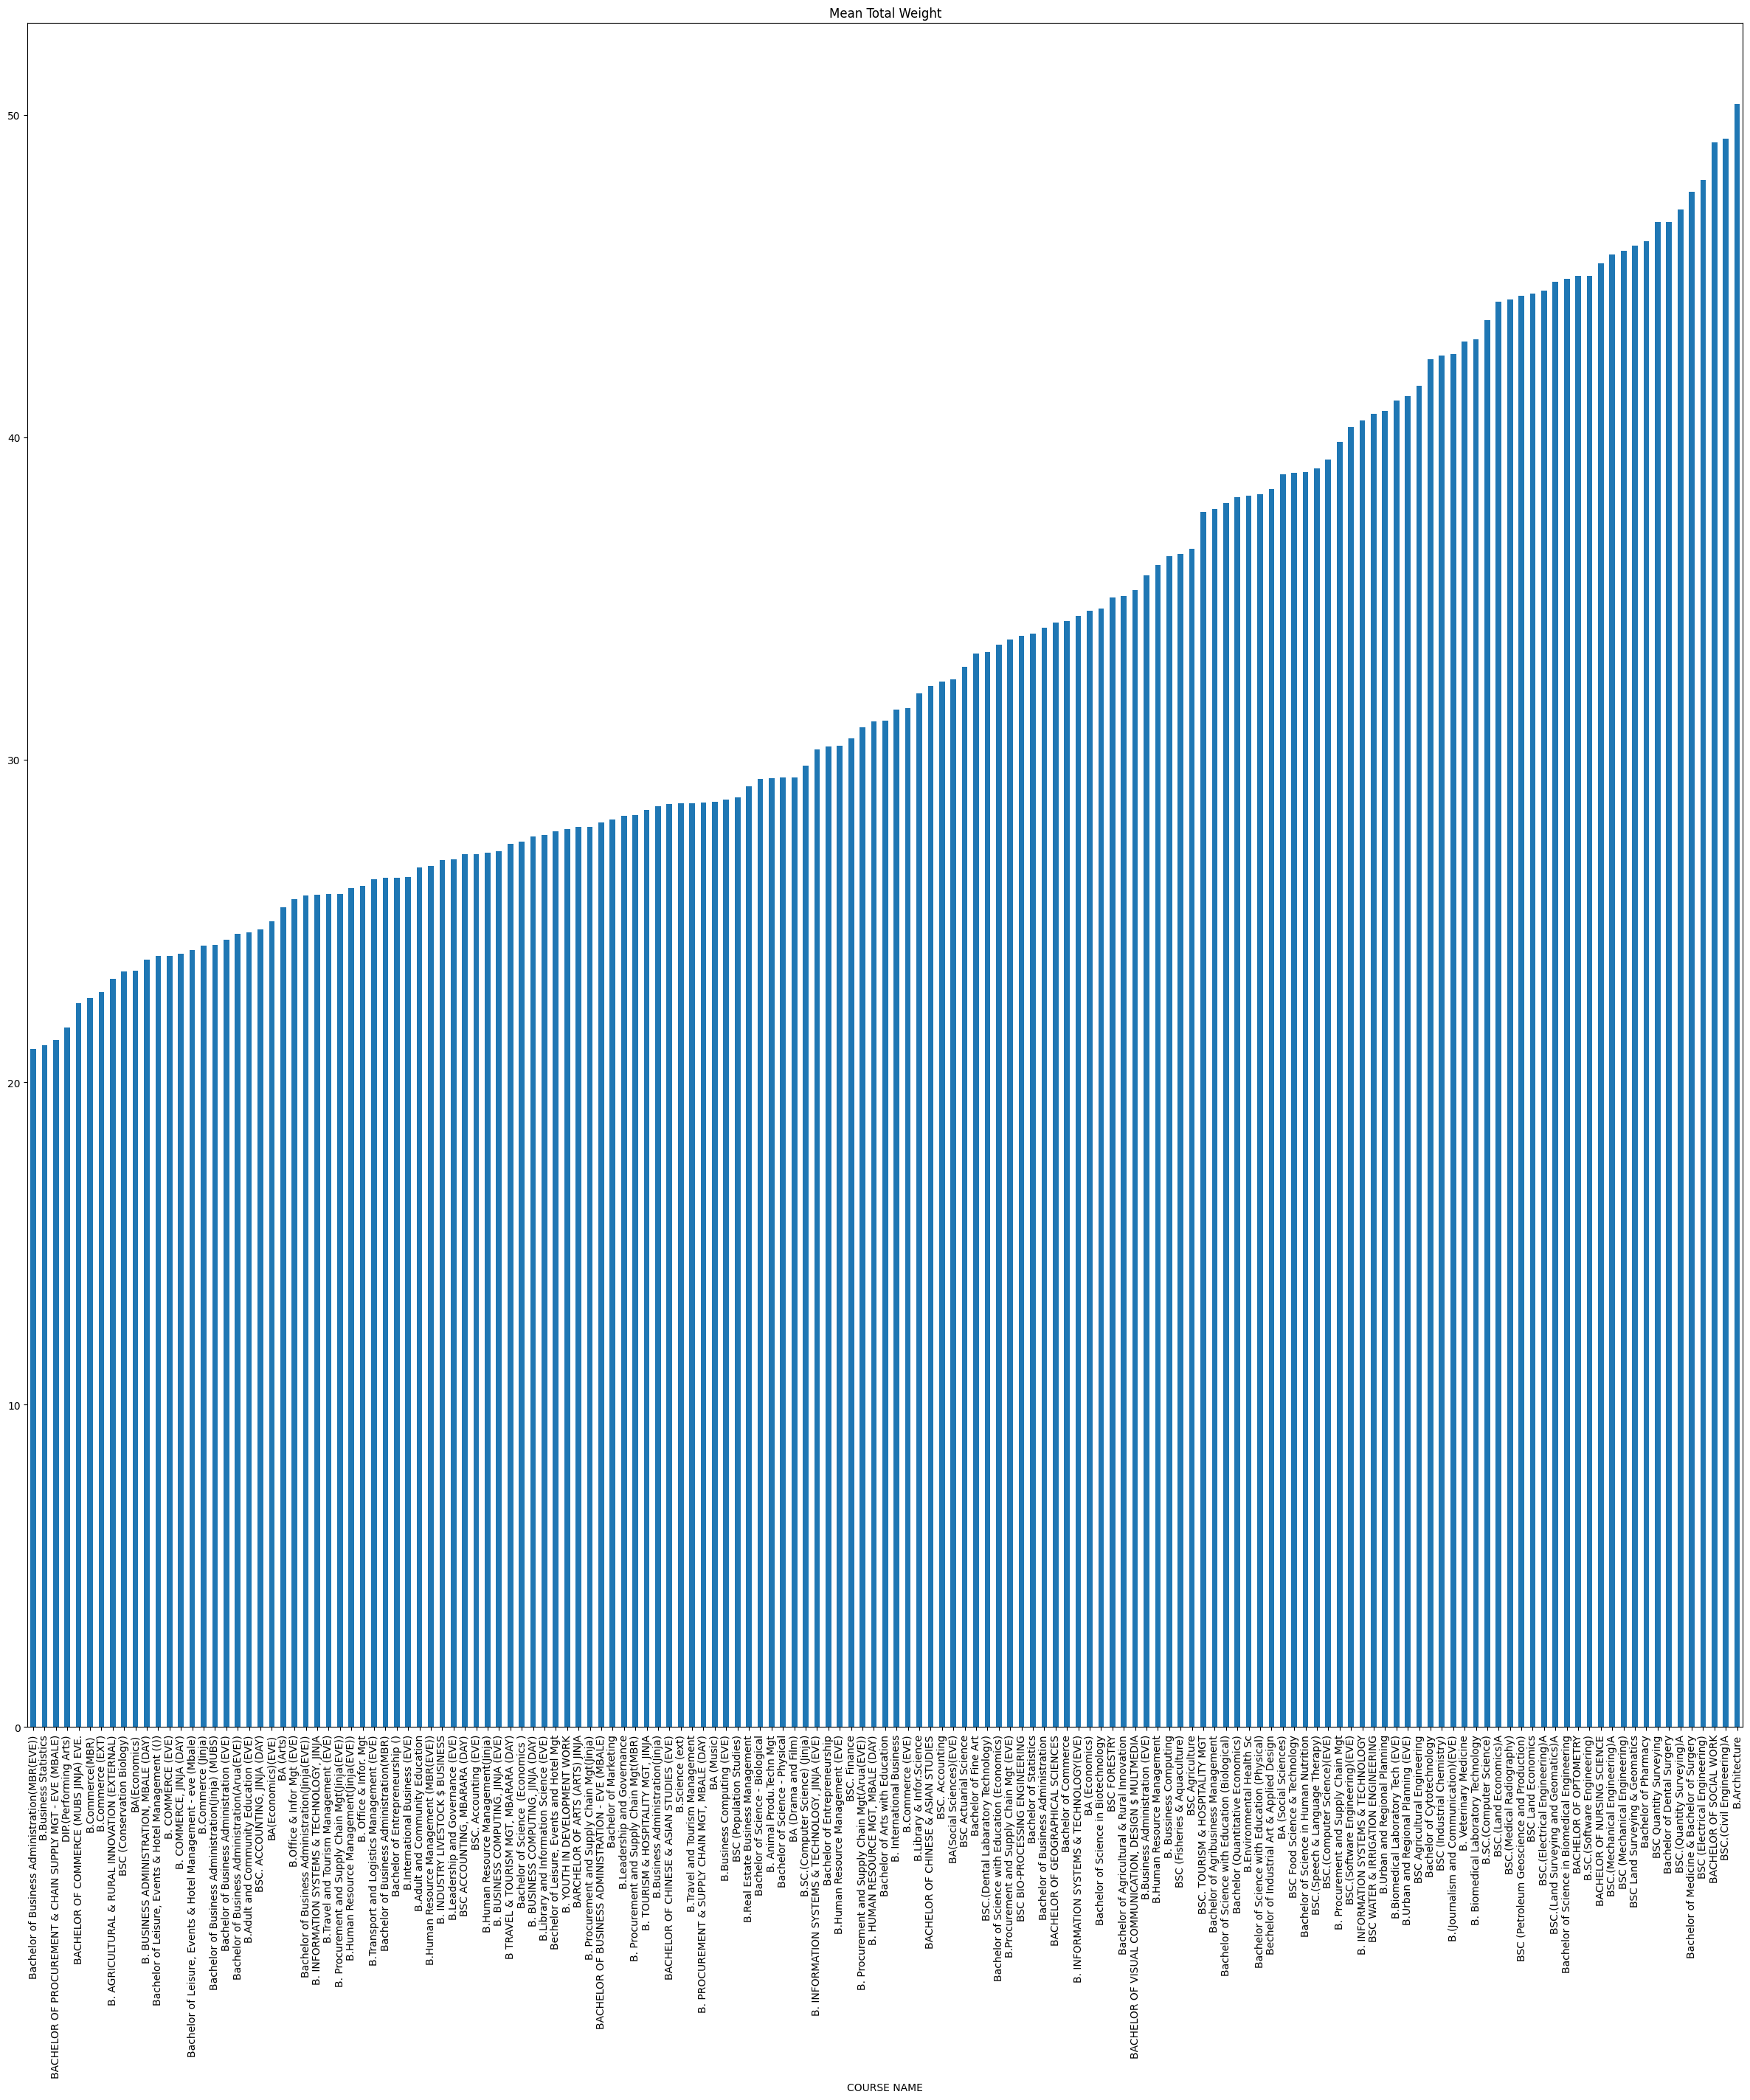

In [209]:
# mean weight per course
plt.figure(
    figsize=(30, 30),
    
    )
makData.groupby(['COURSE NAME'])['TOTAL WEIGHT'].agg('mean').sort_values().plot(
    kind="bar",
    title="Mean Total Weight",
    x="Course Name",
    y="Mean Total Weight",
);
plt.savefig("MeanTotalWeight.png")

In [210]:
grouped = makData.groupby(['REGION'])['TOTAL WEIGHT']

In [211]:
# iterating over groups
for name, group in makData[[
                            'REGION',
                            # 'DISTRICT',
                            # 'SCHOOL INDEX',
                            'GENDER']].groupby('REGION'
#                                                , as_index=False
                                              ):
    print(name)
    print(group)

Central
        REGION GENDER
0      Central      M
1      Central      M
3      Central      F
5      Central      M
6      Central      F
...        ...    ...
14898  Central      M
14899  Central      M
14902  Central      M
14904  Central      M
14905  Central      M

[5584 rows x 2 columns]
Eastern
        REGION GENDER
11     Eastern      M
18     Eastern      F
24     Eastern      M
30     Eastern      M
32     Eastern      F
...        ...    ...
14890  Eastern      M
14892  Eastern      F
14909  Eastern      F
14910  Eastern      F
14914  Eastern      F

[2662 rows x 2 columns]
Northern
         REGION GENDER
52     Northern      M
70     Northern      M
86     Northern      M
104    Northern      F
125    Northern      F
...         ...    ...
14901  Northern      M
14906  Northern      F
14911  Northern      M
14912  Northern      F
14913  Northern      F

[1174 rows x 2 columns]
Western
        REGION GENDER
2      Western      F
4      Western      F
9      Western      M


In [212]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Central,5584.0,31.706805,7.786636,8.9,26.0,31.6,37.3,53.6
Eastern,2662.0,30.593539,7.842878,8.9,24.8,30.2,36.3,53.5
Northern,1174.0,31.539523,7.942785,10.2,25.8,31.5,37.5,53.9
Western,4250.0,31.344965,7.875445,9.1,25.4,31.3,37.0,53.6


In [213]:
# Top 10 student with highest total weight
def top(df, n=10, column='TOTAL WEIGHT'):
    return df.sort_values(column,
                         ascending=False)[:n]

In [214]:
# Returns the top 10 students with the highest total weight.
# Further analysis can be done to find statistics for this analysis.
top10 = top(makData, n=10)

In [215]:
top10.groupby(['SCHOOL INDEX',])['INDEX NO'].count()

SCHOOL INDEX
U0013    1
U0060    1
U0061    1
U0077    1
U0801    1
U0802    1
U1224    2
U1249    1
U2789    1
Name: INDEX NO, dtype: int64

In [216]:
# Top 10 distribution by Region, District and Gender
top10.groupby(['REGION', 'DISTRICT', 'GENDER'])['TOTAL WEIGHT'].count()

REGION    DISTRICT   GENDER
Central   KAYUNGA    M         1
          MASAKA     F         1
          MUKONO     F         1
          SEMBABULE  M         1
Eastern   KAMULI     F         1
          KAPCHORWA  F         1
Northern  LIRA       F         1
Western   KISORO     F         1
                     M         1
          MBARARA    M         1
Name: TOTAL WEIGHT, dtype: int64

In [217]:
makData.iloc[190]

APPLICATION NO                   23APF922973038147370
SCHOOL INDEX                                    U0525
INDEX NO                                    U0525/510
NAME                                   AHUMUZA BRENDA
GENDER                                              F
UACE YEAR                                        2022
CODE                                             12.0
DISTRICT                                       KABALE
COURSE CODE                                       ADM
COURSE NAME       Bachelor of Business Administration
TOTAL WEIGHT                                     45.4
WEIGHT RANGE                                Very Good
SCHOOL                         ST.PAUL'S S S  BUKINDA
REGION                                        Western
Name: 190, dtype: object

In [218]:
# last 10 students admitted by total weight
def last(df, n, column='TOTAL WEIGHT'):
    return df.sort_values(column,
                         ascending=True)[:n]

In [219]:
last10 = last(makData, n=10)

In [220]:
# This informs hidden patterns in socio-economic lives of people
# from this regions
last10.groupby(by=['REGION'])['NAME'].count()

REGION
Central     4
Eastern     1
Northern    2
Western     3
Name: NAME, dtype: int64

In [221]:
last10.groupby(['REGION', 'DISTRICT'])['TOTAL WEIGHT'].count()

REGION    DISTRICT
Central   BUIKWE      1
          KAMPALA     1
          WAKISO      2
Eastern   TORORO      1
Northern  ABIM        1
          GULU        1
Western   KAMWENGE    1
          KIRUHURA    1
          MBARARA     1
Name: TOTAL WEIGHT, dtype: int64

In [222]:
# Quartiles
# Quartiles are data categories thus data can be categorized
# using quartiles
quartiles = pd.cut(makData['TOTAL WEIGHT'],
                   4,
                   labels=["Very Low", "Low", "High", "Very High"])

In [223]:
quartiles

0        High
1        High
2        High
3        High
4        High
         ... 
14910    High
14911    High
14912    High
14913    High
14914    High
Name: TOTAL WEIGHT, Length: 14915, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

In [224]:
# Grouping by quartiles
makData.groupby(quartiles)['TOTAL WEIGHT'].agg(["min", "max", "mean", "count"])

C:\Users\Kakaire Steven\AppData\Local\Temp\ipykernel_2132\3350520744.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  makData.groupby(quartiles)['TOTAL WEIGHT'].agg(["min", "max", "mean", "count"])


,min,max,mean,count
TOTAL WEIGHT,,,,
Very Low,8.9,20.1,17.641293,1160
Low,20.2,31.4,26.372179,6380
High,31.5,42.6,36.348959,6101
Very High,42.7,53.9,45.423783,1274


In [225]:
# I bin starting with 0, logically, none can be admitted with zero points
# bins = pd.IntervalIndex.from_tuples([(0, 20), (21, 30), (31, 40), (41, 55)])
bins = [0, 20, 30, 40, 55]
quartiles2 = pd.cut(makData['TOTAL WEIGHT'],
                     bins,
                     right=True,
#                      retbins=True,
                     labels=False)

In [226]:
# There is more the mind can explore and apply. Uncage your imagination
# and let it go wild.

In [227]:
quartiles2

0        3
1        3
2        3
3        2
4        2
        ..
14910    3
14911    3
14912    3
14913    3
14914    3
Name: TOTAL WEIGHT, Length: 14915, dtype: int64

In [228]:
makData.to_csv('../Data/Private2.csv')